Load và xử lý dữ liệu


In [ ]:
# from geopy.geocoders import Nominatim
import pandas as pd
import ast
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from  sklearn.preprocessing import StandardScaler

sn= StandardScaler()

data = pd.read_csv("adopt.project.csv")
locationList = data["country"]

# geolocator = Nominatim(user_agent="covid19")
# print(len(set(locationList)))
# lat = {}
# long = {}
# for i in set(locationList):
#     # print(i)
#     location = geolocator.geocode(i)
#     lat[i] =  location.latitude
#     long[i] = location.longitude

f1 = open("lat", 'r')
lat_str = f1.read()
f1.close()
lat = ast.literal_eval(lat_str)

f2 = open("long", 'r')
long_str = f2.read()
f2.close()
long = ast.literal_eval(long_str)
symptomList = data["symptom"]
data['lat'] = np.zeros(len(data))
data['long'] = np.zeros(len(data))
for j in range(len(data)):
    data['lat'][j] = lat[locationList[j]]
    data['long'][j] = long[locationList[j]]
    if(data['gender'][j] == "male"):
        data['gender'][j] = 1
    elif(data['gender'][j] == "female"):
        data['gender'][j] = 0
    else:
        data['gender'][j] = -1
    if(str(symptomList[j]) == "nan"):
        data['symptom'][j] = 0
    else:
        lst = str(symptomList[j]).split(",")
        data['symptom'][j] = len(lst)
# y, count = np.unique(data['symptom'], return_counts=True)
data = data.drop(columns=["Unnamed: 3","id", "case_in_country", "reporting date", "summary", "location", "country"])
print(data.shape)
data.describe()
data.info()
feature = list(set(list(data.columns))-set(["death"]))
x = data[feature].values
y = data['death']
x=sn.fit_transform(x)
x0 = np.full((x.shape[0],1),1)
X = np.vstack([np.hstack([x0, x])])
D = X.shape[1]
N = X.shape[0]
print(X)
print(y)
c, count = np.unique(y, return_counts=True)
print(c)
print(count)

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


def cost(X, y,params):
    h = sigmoid(np.dot(X, params))
    J = np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h))
    return -J / N


def gradient(X, y,params):
    h = sigmoid(np.dot(X, params))
    return np.dot(X.transpose(), (h - y)) / len(y)
def hessian(X, params):
    Y = sigmoid(np.dot(X, params))
    result = sum([h * (1-h) * np.outer(X[i],X[i]) for i,h in enumerate(Y)])
    return result/len(Y)



(843, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          843 non-null    object 
 1   age             843 non-null    float64
 2   visiting Wuhan  843 non-null    int64  
 3   from Wuhan      843 non-null    int64  
 4   death           843 non-null    int64  
 5   symptom         843 non-null    object 
 6   lat             843 non-null    float64
 7   long            843 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 52.8+ KB
[[ 1.         -0.57944643  0.103369   ... -2.69854914 -1.00759326
  -0.46901072]
 [ 1.         -0.57944643  0.00532048 ... -2.68484638 -1.78814976
  -0.46901072]
 [ 1.         -0.57944643  0.00532048 ... -2.65744087 -1.78814976
  -0.46901072]
 ...
 [ 1.         -0.57944643  0.51347353 ...  1.39857524  0.519598
  -0.46901072]
 [ 1.          0.35812236  0.75914326 ...  1.94

In [ ]:
import seaborn as sns

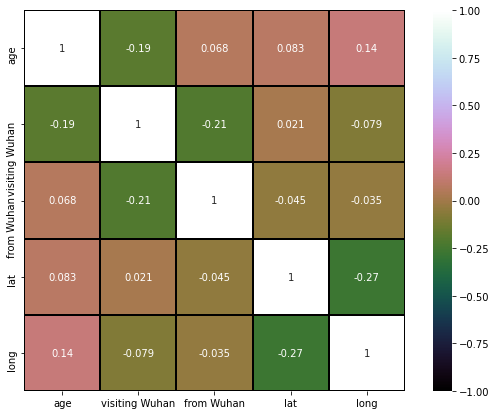

In [ ]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(data.drop(columns=("death")).corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

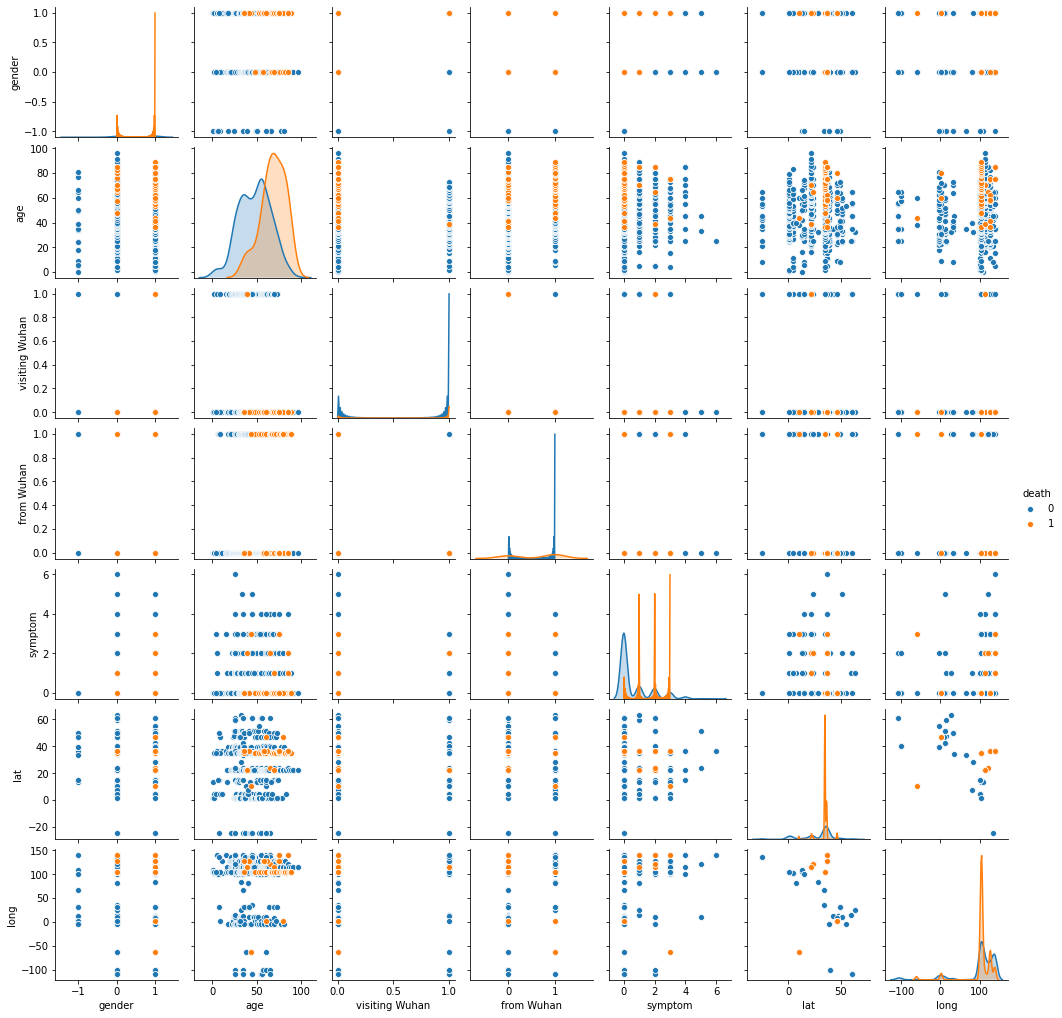

In [ ]:
sns.pairplot(data, hue="death", size=2, diag_kind="kde")
plt.show()

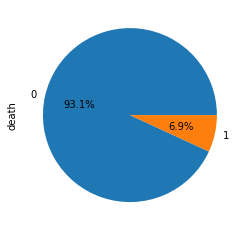

In [ ]:
y.value_counts().plot.pie(autopct='%1.1f%%')

Định nghĩa các hàm và so sánh tổng hợp


bgd Time:  0.3372572939999827 
so vong lap can la 503 
loss =  0.15455101030361423 


sgd Time:  0.04068631699999514 
so vong lap can la 74 
loss =  0.36175178469416663 


mgd Time:  0.6400889650000181 
so vong lap can la 415 
loss =  0.15514205119918784 


nag Time:  0.02320649399996455 
so vong lap can la 36 
loss =  0.15579443976821875 



newton Time:  0.03684118900002886 
so vong lap can la 4 
loss =  0.15501848696289658 


NAG_backtracking time:  0.07522243700009312 
so vong lap can la 39 
loss =  0.15922738433357628 


Rand_CD time:  0.30424256100002367 
so vong lap can la 800 
loss =  0.1590251617796938 


FISTA time:  0.02062937100004092 
so vong lap can la 21 
loss =  0.15788554141211278 




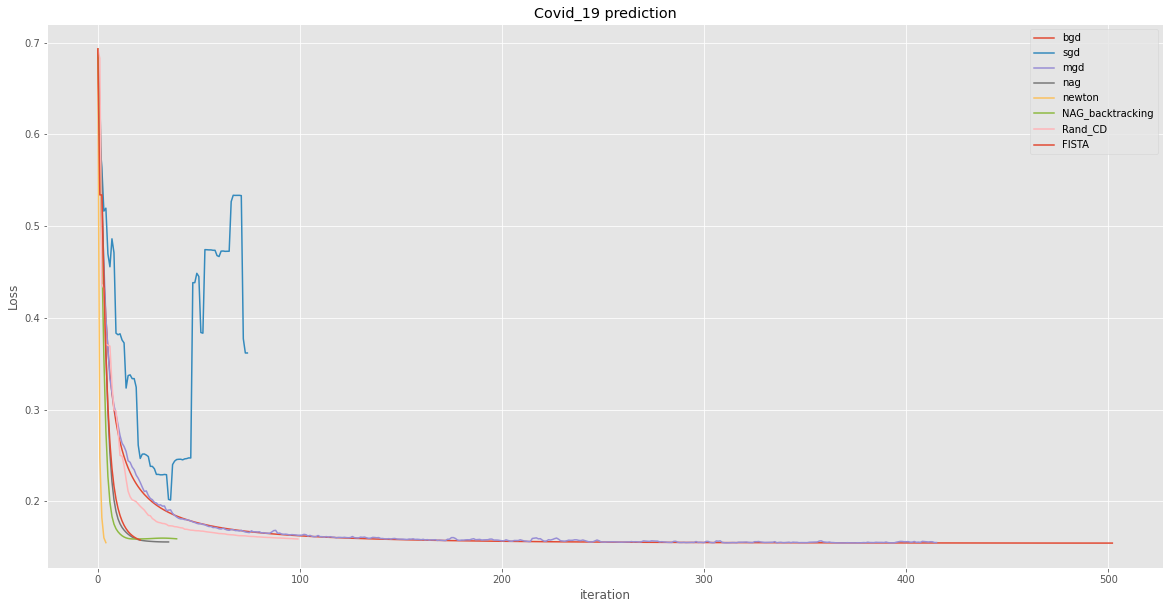

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import timeit
plt.style.use('ggplot')
sn = StandardScaler()



def gradient_descent_step_fixed(X, y, params_init, step_size, iters):
    params = [params_init]
    cost_store = [cost(X, y, params_init)]
    for iter in range(1, iters):
        pars_new = params[-1] - step_size * gradient(X, y, params[-1])
        params.append(pars_new)
        cost_store.append(cost(X, y, pars_new))
        # check convergence: stop if gradient small enough
        # if np.linalg.norm(gradient(X, y, pars_new)) / len(pars_new) < 0.001:
        #     break
        # 2 check convergence: So sánh giá trị hàm cost 2 lần liên tiếp
        if np.abs(cost_store[iter]-cost_store[iter-1]) < 1e-6:
             break
    return params, cost_store, iter

def gradient_descent_backtracking(X, y, params_init, step_size_0, alpha, beta, iters):
    params = [params_init]
    cost_store = [cost(X, y, params_init)]
    pars_new = params[0] - step_size_0 * gradient(X, y, params[0])
    for iter in range(1, iters):
        step_size = step_size_0
        grad = gradient(X, y, params[iter - 1])
        while cost(X, y, pars_new) > cost_store[iter - 1] - alpha * step_size * np.linalg.norm(grad) ** 2:
            step_size *= beta
            pars_new = params[iter - 1] - step_size * grad
            params.append(pars_new)
            cost_store.append(cost(X, y, pars_new))
        # 1 check convergence: stop if gradient small enough
            if np.linalg.norm(gradient(X, y, pars_new)) / len(pars_new) < 0.01:
                break
        # 2 check convergence: So sánh giá trị hàm cost 2 lần liên tiếp
        # if np.abs(cost_store[iter]-cost_store[iter-1]) < 1e-6:
        #     break
    return params, cost_store, iter
def sgd(X, y, lr, epochs):
    theta_0 = np.zeros(D)
    theta_list = [theta_0]
    loss_0 = cost(X, y, theta_0)
    loss_list = [loss_0]
    iters = 0
    for t in range(epochs):
        rand_index = np.random.permutation(N)
        for i in rand_index:
            xi = X[i, :][np.newaxis]
            yi = y[i][np.newaxis]
            grad = gradient(xi, yi, theta_list[-1])
            theta_new = theta_list[-1] - lr * grad
            loss_new = cost(X, y, theta_new)
            if np.abs(loss_new - loss_list[-1]) < 1e-6: 
                return theta_list, loss_list, iters, t+1
            iters += 1
            loss_list.append(loss_new)
            theta_list.append(theta_new)  
    return theta_list[-1], loss_list, iters, t+1
def mgd(X, y, alpha, T, batch_size=32):
    cost_store = []
    iter = 1
    theta = np.zeros((D))
    cost_store.append(cost(X, y,theta))
    for t in range(1, T):
        X, y = shuffle(X, y)
        # print(t)
        for i in range(0, N, batch_size):
            X_i = X[i:i + batch_size]
            y_i = y[i:i + batch_size]
            grad = gradient(X_i, y_i,theta)
            new_theta = theta - alpha * grad
            cost_store.append(cost(X, y,new_theta))
            if np.abs(cost(X, y, new_theta) - cost(X, y,theta)) < 1e-6:
                return cost_store, iter
            theta = new_theta
            iter += 1
    return cost_store, iter - 1, theta

def GD_NAG(X, y, eta, gamma, T):
    w = np.zeros(X.shape[1])
    cost_store = [cost(X, y, w)]
    v = np.zeros_like(w)
    for it in range(1, T):
        v = gamma * v + eta * gradient(X, y, w - gamma * v)
        w = w - v
        cost_store.append(cost(X, y, w))
        # if np.linalg.norm(gradient(X, y, w)) / len(w) < 1e-3:
        #     break
        if (np.abs(cost_store[it] - cost_store[it-1]) < 1e-6):
            break
    return (w, it, cost_store)
def GD_NAG_backtracking(X, y, eta, gamma,beta, T):
    w = np.zeros(X.shape[1])
    cost_store = [cost(X, y, w)]
    v = np.zeros_like(w)
    for it in range(1, T):
        learning_rate = 1
        v = gamma * v + eta * gradient(X, y, w - gamma * v)
        while cost(X,y,w-learning_rate * v) > cost(X,y,w) - learning_rate * np.dot(gradient(X,y,w).T, v) + learning_rate * (np.linalg.norm(v) ** 2) / 2:
            learning_rate *= beta
            # print(learning_rate)
        w = w - learning_rate * v
        cost_store.append(cost(X, y, w))
        if np.linalg.norm(gradient(X, y, w)) / len(w) < 1e-3:
            break
    return w, cost_store, it
def newton(X, y, T, backtrack = False):
    w = np.zeros(X.shape[1])
    cost_store = [cost(X, y, w)]
    alpha = 0.5
    beta = 0.9
    for t in range(1,T):
        step_size = 1
        grad = gradient(X, y,w)
        hes = hessian(X, w)
        v = np.linalg.solve(hes, -grad)
        if(backtrack):
            # print(cost(X, y, w + step_size*v))
            # print(cost(X, y, w) + step_size*alpha*np.dot(grad.T, v))
            # print()
            while cost(X, y, w + step_size*v) > cost(X, y,w) + step_size*alpha*np.dot(grad.T, v):
                step_size = beta*step_size
        w = w + step_size*v
        cost_store.append(cost(X, y,w))
        if np.linalg.norm(gradient(X, y,w)) / len(w) < 1e-3:
            break
        # if (np.abs(cost_store[t] - cost_store[t-1]) < 1e-5):
        #     break
    return cost_store, t, w
def Rand_CD(X, y, lr, T):
    D = X.shape[1]
    w = np.zeros(D)
    cost_store = []
    iter = 0
    for t in range(0, T):
        cost_store.append(cost(X, y,w))
        for i in range(0, D):
            i = np.random.randint(0, D)
            w[i] = w[i] - lr * gradient(X, y,w)[i]
            iter += 1
        if np.linalg.norm(gradient(X, y,w)) / D < 1e-3:
            break
    return w, cost_store, iter, t


def Cylic_CGD(X, y, lr, T):
    D = X.shape[1]
    w = np.zeros(D)
    cost_store = []
    iter = 0
    for t in range(0, T):
        cost_store.append(cost(X, y,w))
        for i in range(0, D):
            w[i] = w[i] - lr * gradient(X, y,w)[i]
            iter += 1
        if np.linalg.norm(gradient(X, y,w)) / D < 1e-3:
            break
    return w, cost_store, iter, t
def FISTA(X, y, lr, T):
    w = np.zeros(X.shape[1])
    v = w
    a = 0.0
    cost_store = []
    for t in range(0, T):
        cost_store.append(cost( X, y,w))
        w_prev = w
        w = v - lr * gradient(X, y,v)
        a_prev = a
        a = (1 + np.sqrt(1 + 4 * a_prev ** 2)) / 2
        v = w + (a_prev - 1) / a * (w - w_prev)
        if np.linalg.norm(gradient(X, y,w)) / D < 1e-3:
            break
    return w, cost_store, t

def plot_gd(cost, iters):
    plt.title("Covid_19 prediction")
    plt.xlabel('iteration')
    plt.ylabel('Loss')
    plt.plot(np.arange(0, iters + 1), cost, label="Covid_19 prediction")
    plt.show()


def plot_legend(cost1, iter_1, cost2, iter_2, cost3, iter_3, cost4,iter_4, cost5,iter_5,cost6,iter_6,cost7,iter_7,cost8,iter_8):
    plt.figure(figsize=(20,10))
    plt.title("Covid_19 prediction")
    plt.xlabel('iteration')
    plt.ylabel('Loss')
    plt.plot(np.arange(len(cost1)), cost1)
    plt.plot(np.arange(len(cost2)), cost2)
    plt.plot(np.arange(len(cost3)), cost3)
    plt.plot(np.arange(len(cost4)), cost4)
    plt.plot(np.arange(len(cost5)), cost5)
    plt.plot(np.arange(len(cost6)), cost6)
    plt.plot(np.arange(len(cost7)), cost7)
    plt.plot(np.arange(len(cost8)), cost8)
    

    plt.legend(["bgd", "sgd","mgd","nag", "newton","NAG_backtracking", "Rand_CD","FISTA"])
    plt.show()

if __name__ == "__main__":
    

    params_init = np.zeros(X.shape[1])
    num_iters_fixed = 10000
    step_size_fixed = 0.6
    start0 = timeit.default_timer()
    pars_fixed, costs_fixed, maxIters = gradient_descent_step_fixed(X, y, params_init, step_size_fixed, num_iters_fixed)
    stop0 = timeit.default_timer()
    print('bgd Time: ', stop0 - start0, "\n" "so vong lap can la", maxIters + 1, "\n" "loss = ", costs_fixed[-1],"\n\n")
    start0 = timeit.default_timer()
    pars1_sgd,cost_sgd,itert_sgd,tx_sgd= sgd(X,y,0.6,100)
    stop0 = timeit.default_timer()
    print('sgd Time: ', stop0 - start0, "\n" "so vong lap can la", itert_sgd, "\n" "loss = ", cost_sgd[-1],"\n\n")


######
    start = timeit.default_timer()
    cost_mgd, iterts_mgd= mgd(X,y,0.6,100,20)
    stop = timeit.default_timer()
    print('mgd Time: ', stop - start, "\n" "so vong lap can la", iterts_mgd, "\n" "loss = ", cost_mgd[-1],"\n\n")
    start = timeit.default_timer()
    (w_mm, it_mm, cost_store) = GD_NAG(X, y, 0.3, 0.9, num_iters_fixed)
    stop = timeit.default_timer()
    print('nag Time: ', stop - start, "\n" "so vong lap can la", it_mm+1, "\n" "loss = ", cost_store[-1],"\n\n")
    print()

    start1 = timeit.default_timer()
    newton_cost, iter_newton,w_newton = newton(X, y, num_iters_fixed)
    stop1 = timeit.default_timer()
    print('newton Time: ', stop1 - start1, "\n" "so vong lap can la", iter_newton, "\n" "loss = ", newton_cost[-1],"\n\n")
    
    start2 = timeit.default_timer()
    pars_nag_back, cost_nagback, maxItersnagback = GD_NAG_backtracking(X,y,0.5, 0.9, 0.7, 1000)
    stop2 = timeit.default_timer()
    print('NAG_backtracking time: ', stop2 - start2, "\n" "so vong lap can la", maxItersnagback, "\n" "loss = ", cost_nagback[-1],"\n\n")

    start2 = timeit.default_timer()
    w_RandCD, cost_store_RandCD, iter_RandCD, t_RandCD=Rand_CD(X,y,0.9,100)
    stop2 = timeit.default_timer()
    print('Rand_CD time: ', stop2 - start2, "\n" "so vong lap can la", iter_RandCD, "\n" "loss = ", cost_store_RandCD[-1],"\n\n")

    start2 = timeit.default_timer()
    w_fista, cost_store_fista, t_fista= FISTA(X,y,0.9,100)
    stop2 = timeit.default_timer()
    print('FISTA time: ', stop2 - start2, "\n" "so vong lap can la", t_fista, "\n" "loss = ", cost_store_fista[-1],"\n\n")
    plot_legend(costs_fixed, maxIters,cost_sgd,itert_sgd, cost_mgd, len(cost_mgd),cost_store, it_mm, newton_cost, iter,  cost_nagback, len(cost_nagback),cost_store_RandCD,len(cost_store_RandCD),cost_store_fista,len(cost_store_fista))

**Backtracking với Newton**


voi alpha 0.05
Nếu beta = 0.1 cần số vòng lặp là:  4 thời gian chạy là 0.03935190199990757
Nếu beta = 0.2 cần số vòng lặp là:  4 thời gian chạy là 0.037941757998851244
Nếu beta = 0.5 cần số vòng lặp là:  4 thời gian chạy là 0.03764267599945015
Nếu beta = 0.7 cần số vòng lặp là:  4 thời gian chạy là 0.038682917000187445
Nếu beta = 0.9 cần số vòng lặp là:  4 thời gian chạy là 0.042756581999128684
voi alpha 0.1
Nếu beta = 0.1 cần số vòng lặp là:  4 thời gian chạy là 0.03840516899981594
Nếu beta = 0.2 cần số vòng lặp là:  4 thời gian chạy là 0.038909339000383625
Nếu beta = 0.5 cần số vòng lặp là:  4 thời gian chạy là 0.03748148300110188
Nếu beta = 0.7 cần số vòng lặp là:  4 thời gian chạy là 0.037141970000448055
Nếu beta = 0.9 cần số vòng lặp là:  4 thời gian chạy là 0.04536854500111076
voi alpha 0.3
Nếu beta = 0.1 cần số vòng lặp là:  4 thời gian chạy là 0.042212288000882836
Nếu beta = 0.2 cần số vòng lặp là:  4 thời gian chạy là 0.0386640910001006
Nếu beta = 0.5 cần số vòng lặp là:  4 th

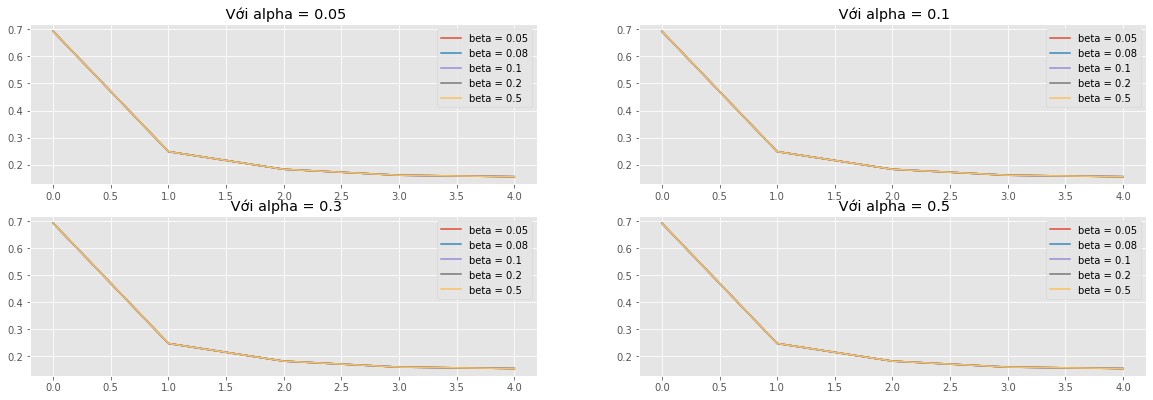

In [ ]:
def newton(X, y, T, backtrack = True):
    w = np.zeros(X.shape[1])
    cost_store = [cost(X, y, w)]
    for t in range(1,T):
        step_size = 1
        grad = gradient(X, y,w)
        hes = hessian(X, w)
        v = np.linalg.solve(hes, -grad)
        if(backtrack):
            # print(cost(X, y, w + step_size*v))
            # print(cost(X, y, w) + step_size*alpha*np.dot(grad.T, v))
            # print()
            while cost(X, y, w + step_size*v) > cost(X, y,w) + step_size*alpha*np.dot(grad.T, v):
                step_size = beta*step_size
        w = w + step_size*v
        cost_store.append(cost(X, y,w))
        if np.linalg.norm(gradient(X, y,w)) / len(w) < 1e-3:
            break
        # if (np.abs(cost_store[t] - cost_store[t-1]) < 1e-5):
        #     break
    return cost_store, t
#backtracking với newton
params_init= np.zeros(X.shape[1])
num_iters_bt = 100
step_size_bt= 0.9
alpha_= np.array([0.05,0.1,0.3,0.5])
beta_= np.array([ 0.1,0.2,0.5,0.7,0.9])
plt.figure(figsize=(20, 10))
for i,alpha in enumerate(alpha_):
    plt.subplot(3,2,i+1)
    print( "voi alpha", alpha, )
    for beta in beta_:
      start2 = timeit.default_timer()
      cost1, maxIters = newton(X,y,num_iters_bt)
      stop2 = timeit.default_timer()
      print("Nếu beta =", beta,"cần số vòng lặp là: ", maxIters, "thời gian chạy là", stop2-start2)
      plt.plot(np.arange(len(cost1)), cost1)
      plt.legend(["beta = 0.05","beta = 0.08", "beta = 0.1","beta = 0.2","beta = 0.5","beta = 0.7"])
      plt.title(" Với alpha = "+ str(alpha))

**BGD với các step_zise khác nhau**


voi step_size Thời gian chạy là 0.1 1.3026615210001182 
so vong lap can la 1904 cost =  0.15505562275790874
voi step_size Thời gian chạy là 0.3 0.5554426559999683 
so vong lap can la 853 cost =  0.1546607539265105
voi step_size Thời gian chạy là 0.5 0.37742925700013075 
so vong lap can la 578 cost =  0.1545736096663547
voi step_size Thời gian chạy là 0.7 0.29918677099999513 
so vong lap can la 445 cost =  0.15453484828866654
voi step_size Thời gian chạy là 0.9 0.24205717499989987 
so vong lap can la 365 cost =  0.1545129334181126
voi step_size Thời gian chạy là 3 0.08773785400012457 
so vong lap can la 137 cost =  0.15445699774602115


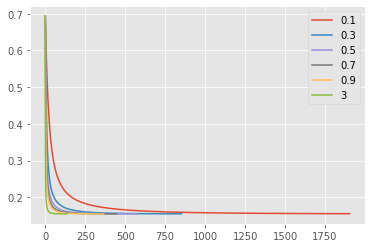

In [ ]:
steplist=[0.1,0.3,0.5,0.7,0.9,3]
for step in(steplist):
    start = timeit.default_timer()
    pars1, cost1,iterts1= gradient_descent_step_fixed(X,y,params_init,step,2000)
    stop = timeit.default_timer()
    print('voi step_size',"Thời gian chạy là", step, stop - start,"\n" "so vong lap can la",iterts1, "cost = ", cost1[-1])
    label=("step size"+ str(step))
    plt.plot(np.arange(len(cost1)),cost1,label= label)
    plt.legend(["0.1","0.3","0.5","0.7","0.9",3])


**NAG với các step_size khác nhau**

voi step_size thời gian chạy là 0.1 0.0672651559998485 
so vong lap can la 99
voi step_size thời gian chạy là 0.3 0.023309418999815534 
so vong lap can la 35
voi step_size thời gian chạy là 0.5 0.06838478899999245 
so vong lap can la 99
voi step_size thời gian chạy là 0.7 0.07717308200017214 
so vong lap can la 99
voi step_size thời gian chạy là 0.9 0.07151751899982628 
so vong lap can la 99


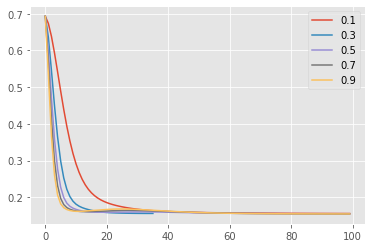

In [ ]:
# check với NAG
steplist=[0.1,0.3,0.5,0.7,0.9]
for step in(steplist):
    start = timeit.default_timer()
    pars1,iterts1,cost1= GD_NAG(X,y,step,0.9,100)
    stop = timeit.default_timer()
    print('voi step_size',"thời gian chạy là", step, stop - start,"\n" "so vong lap can la",iterts1)
    label=("step size"+ str(step))
    plt.plot(np.arange(len(cost1)),cost1,label= label)
    plt.legend(["0.1","0.3","0.5","0.7","0.9"])
    

**BGD với backtracking**

voi alpha 0.5
Nếu beta = 0.05 cần số vòng lặp là:  226 thời gian chạy là 0.3820149399998627 cost 0.2241400763830416
Nếu beta = 0.08 cần số vòng lặp là:  142 thời gian chạy là 0.24680640900078288 cost 0.22401471675870943
Nếu beta = 0.1 cần số vòng lặp là:  114 thời gian chạy là 0.19327996799984248 cost 0.22393105546735825
Nếu beta = 0.2 cần số vòng lặp là:  57 thời gian chạy là 0.1018854289995943 cost 0.22467910504283914
Nếu beta = 0.5 cần số vòng lặp là:  23 thời gian chạy là 0.044548265999765135 cost 0.22639407839145095
Nếu beta = 0.7 cần số vòng lặp là:  17 thời gian chạy là 0.030283439000413637 cost 0.225471771606577
voi alpha 0.6
Nếu beta = 0.05 cần số vòng lặp là:  226 thời gian chạy là 0.3882792120002705 cost 0.2241400763830416
Nếu beta = 0.08 cần số vòng lặp là:  142 thời gian chạy là 0.24908627299919317 cost 0.22401471675870943
Nếu beta = 0.1 cần số vòng lặp là:  114 thời gian chạy là 0.19445511100093427 cost 0.22393105546735825
Nếu beta = 0.2 cần số vòng lặp là:  57 thời gian 

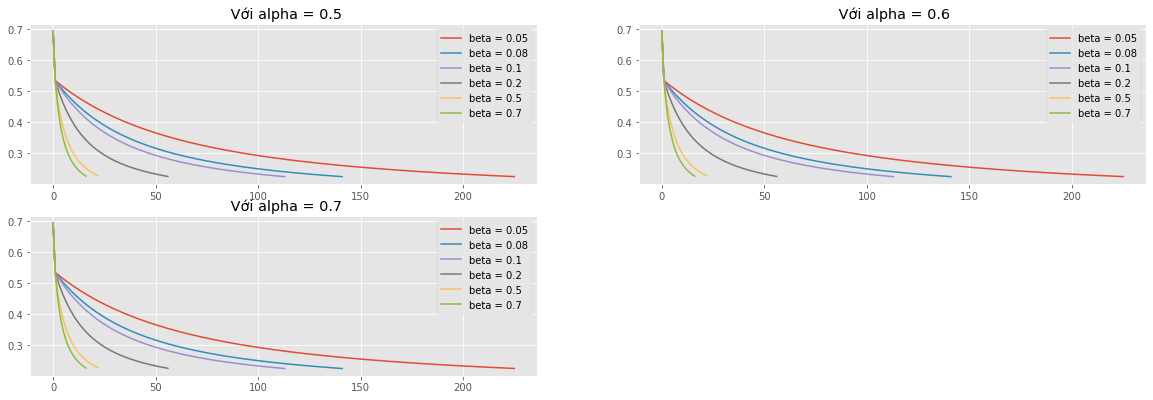

In [ ]:
def gradient_descent_backtracking(X, y, params_init, step_size_0, alpha, beta, iters):
    params = [params_init]
    cost_store = [cost(X, y, params_init)]
    pars_new = params[0] - step_size_0 * gradient(X, y, params[0])
    for iter in range(1, iters):
        step_size = step_size_0
        grad = gradient(X, y, params[iter - 1])
        while cost(X, y, pars_new) > cost_store[iter - 1] - alpha * step_size * np.linalg.norm(grad) ** 2:
            step_size *= beta
            pars_new = params[iter - 1] - step_size * grad

        # 1 check convergence: stop if gradient small enough
        if np.linalg.norm(gradient(X, y, pars_new)) / len(pars_new) < 0.01:
            break
        # 2 check convergence: So sánh giá trị hàm cost 2 lần liên tiếp
       # if np.linalg.norm(cost(X, y, pars_new)-cost(X, y, params[iter-1])) < 1e-4:
       #      break
        params.append(pars_new)
        cost_store.append(cost(X, y, pars_new))
    return params, cost_store, iter


    
params_init= np.zeros(X.shape[1])
num_iters_bt = 100
step_size_bt= 0.9
alpha_= np.array([0.5,0.6,0.7])
beta_= np.array([0.05,0.08, 0.1,0.2,0.5,0.7])
plt.figure(figsize=(20, 10))
for i,alpha in enumerate(alpha_):
    plt.subplot(3,2,i+1)
    print( "voi alpha", alpha, )
    for beta in beta_:
      start= timeit.default_timer()
      pars, cost_back, maxIters = gradient_descent_backtracking(X,y,params_init,step_size_bt, alpha, beta, 700)
      stop = timeit.default_timer()
      print("Nếu beta =", beta,"cần số vòng lặp là: ", maxIters, "thời gian chạy là", stop- start, "cost", cost_back[-1])
      plt.plot(np.arange(len(cost_back)), cost_back)
      plt.legend(["beta = 0.05","beta = 0.08", "beta = 0.1","beta = 0.2","beta = 0.5","beta = 0.7"])
      plt.title(" Với alpha = "+ str(alpha))
#lấy alpha = 0.3 và beta = 0.5

**NAG với backtracking**

Nếu beta = 0.05 cần số vòng lặp là:  41
Nếu beta = 0.08 cần số vòng lặp là:  41
Nếu beta = 0.1 cần số vòng lặp là:  41
Nếu beta = 0.2 cần số vòng lặp là:  41
Nếu beta = 0.5 cần số vòng lặp là:  41
Nếu beta = 0.7 cần số vòng lặp là:  41
Nếu beta = 0.9 cần số vòng lặp là:  41


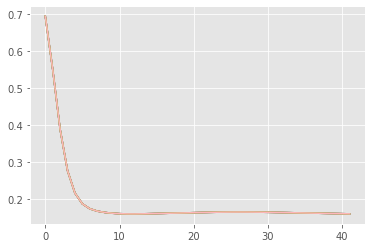

In [ ]:
def GD_NAG_backtracking(X, y, eta, gamma,beta, T):
    w = np.zeros(X.shape[1])
    cost_store = [cost(X, y,w)]
    v = np.zeros_like(w)
    for it in range(1, T):
        learning_rate = 1
        v = gamma * v + eta * gradient(X, y,w - gamma * v)
        c = cost(X, y,w)
        g = gradient(X, y,w)
        while cost(X, y,w-learning_rate * v) > c - learning_rate * np.dot(g.T, v) + learning_rate * (np.linalg.norm(v) ** 2) / 2:
              learning_rate *= beta
        w = w - learning_rate * v
        cost_store.append(cost(X, y,w))
        if np.linalg.norm(gradient(X, y,w)) / len(w) < 1e-3:
            break
    return cost_store, it

# chạy hàm trên

num_iters_bt = 500
beta_= np.array([0.05,0.08, 0.1,0.2,0.5,0.7,0.9]) 

for beta in beta_:
    cost1, maxIters = GD_NAG_backtracking(X,y, 0.8, 0.9, beta, 500)
    print("Nếu beta =", beta,"cần số vòng lặp là: ", maxIters)
    plt.plot(np.arange(len(cost1)), cost1)
    

In [ ]:
def sgd(X, y, lr, epochs):
    theta_0 = np.zeros(D)
    theta_list = [theta_0]
    loss_0 = cost(X, y, theta_0)
    loss_list = [loss_0]
    iters = 0
    for t in range(epochs):
        rand_index = np.random.permutation(N)
        for i in rand_index:
            xi = X[i, :][np.newaxis]
            yi = y[i][np.newaxis]
            grad = gradient(xi, yi, theta_list[-1])
            theta_new = theta_list[-1] - lr * grad
            loss_new = cost(X, y, theta_new)
            #if np.abs(loss_new - loss_list[-1]) < 1e-6: 
            if iters%5==0:
              if np.linalg.norm(gradient(X, y, theta_new)) / len(theta_new) < 0.001:
                return theta_list, loss_list, iters, t+1
            iters += 1
            loss_list.append(loss_new)
            theta_list.append(theta_new)  
    return theta_list, loss_list, iters, t+1

voi step_size thời gian chạy là 0.05 1.5791587829999116 
so vong lap can la 3165
voi step_size thời gian chạy là 0.1 0.7812544880002861 
so vong lap can la 1560
voi step_size thời gian chạy là 0.2 0.44494698599964977 
so vong lap can la 875


KeyboardInterrupt: ignored

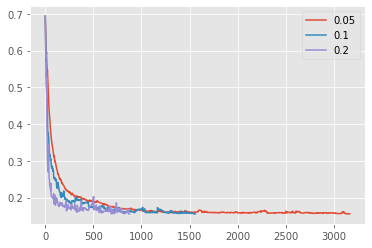

In [ ]:
steplist=[0.05,0.1,0.2,0.4,0.6,0.9]
for step in(steplist):
    start = timeit.default_timer()
    pars1,cost1,iterts1,tx= sgd(X,y,step,100)
    stop = timeit.default_timer()
    print('voi step_size',"thời gian chạy là", step, stop - start,"\n" "so vong lap can la",iterts1)
    label=("step size"+ str(step))
    plt.plot(np.arange(len(cost1)),cost1,label= label)
    plt.legend(["0.05","0.1","0.2",0.4,0.6, 0.9])

In [ ]:
from sklearn.utils import shuffle
def get_batches(X, y, batch_size):
    data_current = np.hstack((X, y.reshape((X.shape[0],1))))
    np.random.shuffle(data_current)
    n_miniBatches = data_current.shape[0]/batch_size
    mini_batches = []
    for i in range(n_miniBatches):
        mini_batch = data_current[i*batch_size:(i+1)*batch_size, :]
        x_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1]
        mini_batches.append((x_mini, y_mini))
    return mini_batches

def mgd(X, y, lr, batch_size, epochs):
    theta_0 = np.zeros(D)
    theta_list = [theta_0]
    loss_0 = cost(X, y, theta_0)
    loss_list = [loss_0]
    iters = 0
    for t in range(epochs):
        mini_batches = get_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            x_mini, y_mini = mini_batch
            grad = gradient(x_mini, y_mini, theta_list[-1])
            theta_new = theta_list[-1] - lr * grad
            loss_new = cost(X, y, theta_new)
            if np.abs(loss_new - loss_list[-1]) < 1e-6: 
                return theta_list, loss_list, iters, t+1
            iters += 1
            loss_list.append(loss_new)
            theta_list.append(theta_new)  
    return theta_list, loss_list, iters, t+1

In [ ]:
r,t,y,u= mgd(X,y,0.1,32,100)
plt.plot(np.arange(len(t)), t)

AttributeError: ignored

In [ ]:
def mgd(X, y, alpha, T, batch_size=32):
    cost_store = []
    iter = 1
    theta = np.zeros((D))
    cost_store.append(cost(X, y,theta))
    for t in range(1, T):
        X, y = shuffle(X, y)
        # print(t)
        for i in range(0, N, batch_size):
            X_i = X[i:i + batch_size]
            y_i = y[i:i + batch_size]
            grad = gradient(X_i, y_i,theta)
            new_theta = theta - alpha * grad
            cost_store.append(cost(X, y,new_theta))
            if np.abs(cost(X, y, new_theta) - cost(X, y,theta)) < 1e-6:
                return cost_store, iter
            theta = new_theta
            iter += 1
    return cost_store, iter - 1

voi step_size 0.5 thời gian chạy là 0.9609526600002027 
so vong lap can la 602
voi step_size 0.7 thời gian chạy là 0.5599332110000432 
so vong lap can la 351
voi step_size 0.9 thời gian chạy là 1.6838938850000886 
so vong lap can la 1060


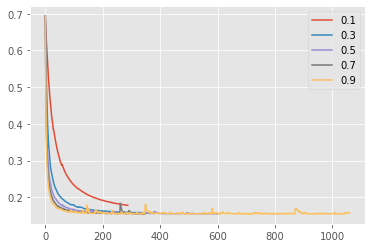

In [ ]:

steplist=[0.1,0.3,0.5,0.7,0.9]
for step in(steplist):
    start = timeit.default_timer()
    cost1, iterts1= mgd(X,y,step,100,30)
    stop = timeit.default_timer()
    print('voi step_size', step,"thời gian chạy là", stop - start,"\n" "so vong lap can la",iterts1)
    label=("step size"+ str(step))
    plt.plot(np.arange(len(cost1)),cost1,label= label)
    plt.legend(["0.1","0.3","0.5","0.7","0.9"])
    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
start = timeit.default_timer()
logisticRegr.fit(X_train, y_train)
stop = timeit.default_timer()
print("library time",stop -start)

library time 0.017893804000323144


In [ ]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9408284023668639


In [ ]:
def predict(X, theta):
    return sigmoid(X.dot(theta)) >= 0.5

In [ ]:
y_predict_bgd = predict(X_test, pars_fixed[-1])
print('bgd accuracy: ', np.sum(y_predict_bgd == y_test)/len(X_test))

bgd accuracy:  0.9585798816568047


In [ ]:

y_predict_sgd = predict(X_test, pars1_sgd[-1])
print('sgd accuracy: ', np.sum(y_predict_sgd == y_test)/len(X_test))

sgd accuracy:  0.8994082840236687


In [ ]:

y_predict_nag = predict(X_test, w_mm)
print('nag accuracy: ', np.sum(y_predict_nag == y_test)/len(X_test))
print(confusion_matrix(y_test, y_predict_nag))

nag accuracy:  0.9585798816568047
[[155   0]
 [  7   7]]


In [ ]:
from sklearn.metrics import confusion_matrix
y_predict_newton = predict(X_test, w_newton)
print('Newton accuracy: ', np.sum(y_predict_newton == y_test)/len(X_test))
print(confusion_matrix(y_test, y_predict_newton))

Newton accuracy:  0.9289940828402367
[[155   0]
 [ 12   2]]


In [ ]:
def Rand_CD(X, y, lr, T):
    D = X.shape[1]
    w = np.zeros(D)
    cost_store = []
    iter = 0
    for t in range(0, T):
        cost_store.append(cost(X, y,w))
        for i in range(0, D):
            i = np.random.randint(0, D)
            w[i] = w[i] - lr * gradient(X, y,w)[i]
            iter += 1
        if np.linalg.norm(gradient(X, y,w)) / D < 1e-3:
            break
    return w, cost_store, iter, t+1

def Cylic_CGD(X, y, lr, T):
    D = X.shape[1]
    w = np.zeros(D)
    cost_store = []
    iter = 0
    for t in range(0, T):
        cost_store.append(cost(X, y,w))
        for i in range(0, D):
            w[i] = w[i] - lr * gradient(X, y,w)[i]
            iter += 1
        if np.linalg.norm(gradient(X, y,w)) / D < 1e-3:
            break
    return w, cost_store, iter, t

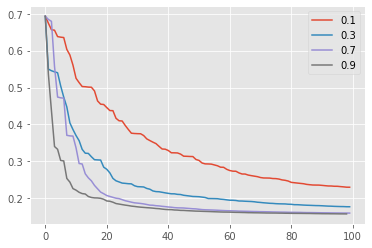

In [ ]:
for step in([0.1,0.3,0.7,0.9]):
    i,o,p,u=Rand_CD(X,y,step,100)
    plt.plot(np.arange(len(o)),o)
    plt.legend([0.1,0.3,0.7,0.9])
   

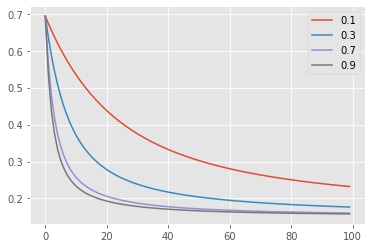

In [ ]:
for step in([0.1,0.3,0.7,0.9]):
    i,o,p,u= Cylic_CGD(X,y,step,100)
    plt.plot(np.arange(len(o)),o)
    plt.legend([0.1,0.3,0.7,0.9]) 

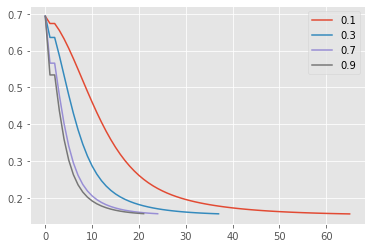

In [ ]:
for step in([0.1,0.3,0.7,0.9]):
    i,o,p= FISTA(X,y,step,100)
    plt.plot(np.arange(len(o)),o)
    plt.legend([0.1,0.3,0.7,0.9]) 

In [ ]:
m=pd.read_csv("adopt.project.csv")
m

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,visiting Wuhan,from Wuhan,death,symptom
0,1,NaN,1/20/2020,NaN,new confirmed COVID-19 patient in Vietnam: 3 m...,Vinh Phuc,Vietnam,NaN,0.25,0,0,0,NaN
1,2,NaN,1/20/2020,NaN,new confirmed COVID-19 patient in Singapore: m...,Singapore,Singapore,male,0.50,0,0,0,NaN
2,3,NaN,1/21/2020,NaN,new confirmed COVID-19 patient in Singapore: 1...,Singapore,Singapore,male,1.00,0,0,0,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,"Hechi, Guangxi",China,female,2.00,1,0,0,NaN
4,5,NaN,1/21/2020,NaN,new confirmed COVID-19 patient in Malaysia: ma...,Johor,Malaysia,male,2.00,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,842,47.0,2/27/2020,NaN,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,male,74.00,0,0,1,NaN
839,843,48.0,2/27/2020,NaN,"new confirmed COVID-19 patient in Japan: male,...",Tokyo,Japan,male,85.00,0,0,1,"fever, pneumonia"
840,844,49.0,2/28/2020,NaN,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,male,75.00,0,0,1,NaN
841,845,50.0,2/28/2020,NaN,"new confirmed COVID-19 patient in Japan: male,...",Hokkaido,Japan,male,85.00,0,0,1,difficulty breathing


In [ ]:
data

,gender,age,visiting Wuhan,from Wuhan,death,symptom,lat,long
0,-1,0.25,0,0,0,0,13.290403,108.426511
1,1,0.50,0,0,0,0,1.357107,103.819499
2,1,1.00,0,0,0,0,1.357107,103.819499
3,0,2.00,1,0,0,0,35.000074,104.999927
4,1,2.00,0,0,0,0,4.569375,102.265682
...,...,...,...,...,...,...,...,...
838,1,74.00,0,0,1,0,36.638392,127.696119
839,1,85.00,0,0,1,2,36.574844,139.239418
840,1,75.00,0,0,1,0,36.638392,127.696119
841,1,85.00,0,0,1,1,36.574844,139.239418


In [ ]:
def accelerated_gd(X, y, lr, interations):
    N = X.shape[0]
    D = X.shape[1]
    loss_list = []
    theta = np.zeros((D))
    for t in range(interations):
        loss_list.append(cost(X, y,theta))
        if t == 0:
            grad = gradient(X, y,theta)
            last_theta = theta
            theta = theta - lr * grad
        else:
            v = theta + (t-1)/(t+2) * (theta - last_theta)
            last_theta = theta
            grad = gradient(X, y,v) 
            theta = v - lr * grad

        if np.linalg.norm(grad)/D < 1e-3:
            break

    return theta, loss_list, t

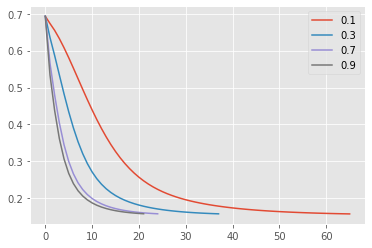

In [ ]:
for step in([0.1,0.3,0.7,0.9]):
    i,o,p= accelerated_gd(X,y,step,100)
    plt.plot(np.arange(len(o)),o)
    plt.legend([0.1,0.3,0.7,0.9]) 